<a href="https://colab.research.google.com/github/Elielichi/IA-OXFORD-course/blob/main/Copy_of_exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning: Linear Regression


<img src="https://i.ibb.co/Yy1MLvV/wizard-2.png" alt="Magic" width="500"/>



In this notebook, we will explore one of the fundamental algorithms in machine learning: linear regression. This algorithm serves as the foundation for many other advanced machine learning models and techniques.

Linear regression is a type of predictive modeling technique which is used to find the linear relationship between a dependent variable and one or more independent variables. The term "linear" refers to the fact that the relationship will be a straight line.

We will start by generating synthetic data for linear regression. We will then split the data into training and testing sets, perform the regression, test the results, and visualize the solution.

In the second part of the notebook, we will introduce the concept of non-linear fitting by generating a polynomial basis for the linear regression problem. This will allow us to model more complex relationships between the variables.

By the end of this notebook, you will have a solid understanding of how linear regression works, how to implement it in Python, and how to visualize its results.

Let's get started!

Disclaimer: The cool wizard images were generated using stable diffusion.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/regression-vs-classification-in-machine-learning.png" alt="Regression vs Classification" width="500"/>


### Import Libraries

In [ ]:
# Importing Necessary Libraries
'''
As usual we always need to include the necessary libraries for our project.
We will be using sklearn which contains implementations of linear and logistic regression
along side many useful functions such as data splitting and metrics for evaluation.
'''

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Data Generation and Visualization

In [ ]:
# Set the default fontsize for titles and labels
plt.rcParams['font.size'] = 15

# Set the default fontsize for ticks
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# Set the default fontsize for legends
plt.rcParams['legend.fontsize'] = 15

### The mighty wizard presents you with data and your task is to manually tune the slope and intercept of the line to provide him with a good fit ... Good luck ! You better please the wizard or else he will cast a spell on you :( !

In [ ]:
np.random.seed(0)  # for reproducibility
# number of samples
N = 1000

# Data generation parameters
slope = 10
intercept = 2
noise_scale = 0.5

# Generate data
X = np.random.rand(N, 1)  # 1000 random numbers
y = slope * X + intercept + noise_scale * np.random.randn(N, 1)  # linear relationship with some noise

def plot_line(slope, intercept):
    # Generate a range of x values
    x_range = np.linspace(X.min(), X.max(), 100)

    # Calculate the corresponding y values from the user-selected slope and intercept
    y_range = slope * x_range + intercept

    # Plot the original data and the user-fitted line
    plt.scatter(X, y, color ='b', alpha=0.5, label="Noisy Data")
    plt.plot(x_range, y_range, color ='r', linewidth=3, label="User-fitted Line")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Generated Data and User Fitted Line', fontweight='bold')
    plt.show()

# Create sliders for interactive parameters
slope_slider = FloatSlider(min=-20, max=20, step=0.5, value=0, description='Slope:')
intercept_slider = FloatSlider(min=-10, max=10, step=0.1, value=0, description='Intercept:')

# Use interact function to create the interaction
interact(plot_line, slope=slope_slider, intercept=intercept_slider)

interactive(children=(FloatSlider(value=0.0, description='Slope:', max=20.0, min=-20.0, step=0.5), FloatSlider…

<function __main__.plot_line(slope, intercept)>

### Sadly, the wizard has 20,000 more lines to fit ... We need to automate this process! (Linear Regression to the Rescue)

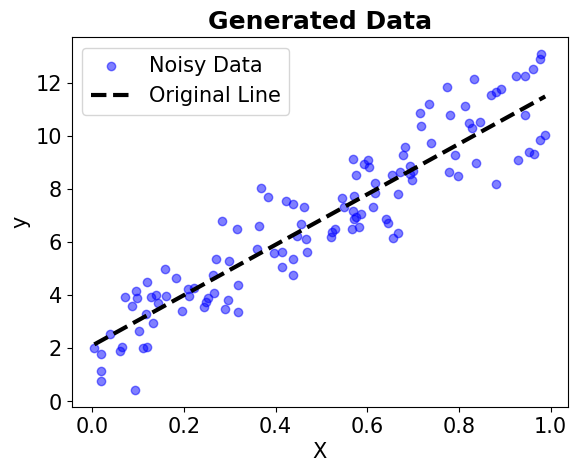

In [ ]:
# We replot the data here along with the original line !
np.random.seed(0)  # for reproducibility

# TODO: select number of samples
N = 120

# TODO: select parameters for the data
slope = 9.5
intercept = 2.1
noise_scale = 0.5

# generate random uniform (use rand in numpy library)
X = np.random.rand(N, 1)

# y equation without noise
y_without_noise =slope * X + intercept + np.random.randn(N, 1)

# noisy data
y = y_without_noise + noise_scale * np.random.randn(N, 1)  # linear relationship with some noise

# Generate a range of x values
x_range = np.linspace(X.min(), X.max(), 100)

# Calculate the corresponding y values (same equation as y_without_noise)
y_range = slope * x_range + intercept

# Plot the original data and the fitted line
plt.scatter(X, y, color ='b', alpha=0.5, label="Noisy Data")
plt.plot(x_range, y_range, color ='k', linestyle='--', linewidth=3, label="Original Line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Generated Data', fontweight='bold')
plt.show()

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training, 20% testing

In [ ]:
# TODO: print the size of the X_train and y_train data
print(f"The size of the X_train is {len(X_train)} and the size of the y_train {len(y_train)}")

# TODO: print the size of the X_test and y_test data
print(f"The size of the X_test is {len(X_test)} and the size of the y_test {len(y_test)}")



The size of the X_train is 96 and the size of the y_train 96
The size of the X_test is 24 and the size of the y_test 24


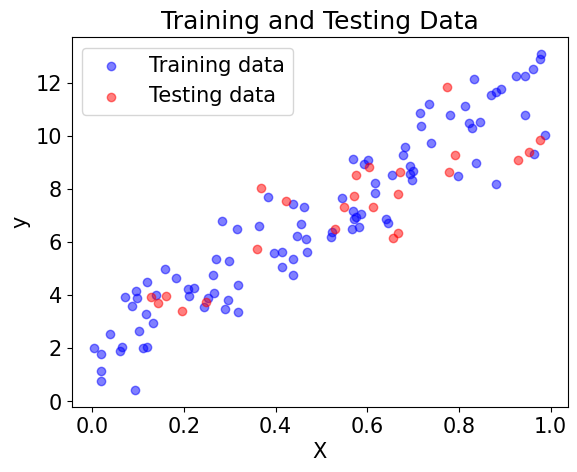

In [ ]:
# use plt.scatter to plot the training data (suggestion for parameters of plot: color ='b', label='Training data', alpha=0.5))
plt.scatter(X_train, y_train, color='b', label='Training data', alpha=0.5 )
# use plt.scatter to plot the testing data (suggestion for parameters of plot: color ='r', label='Testing data', alpha=0.5))
plt.scatter(X_test, y_test, color ='r', label='Testing data', alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Training and Testing Data')
plt.legend()  # add a legend
plt.show()

### Model Fitting and Prediction

In [ ]:
# We will use sklearn LinearRegression module!
model = LinearRegression()  # create a linear regression model

# we can use the method ".fit" to fit the data
model.fit(X_train, y_train)  # train the model

LinearRegression()

In [ ]:
# print fitting slope and intercept
print("Estimated Slope: ", model.coef_)
print("Estimated Intercept:", model.intercept_)

Estimated Slope:  [[10.2791884]]
Estimated Intercept: [1.79798617]


### Investigating what does the function ".fit" from the class "LinearRegression" do?

* Recall from the class that the optimization problem has the following form:
$$
\min_{w_0,w_1} \mathcal{L}(w_0,w_1) = \frac{1}{N} \sum_{i=1}^N(w_0 + w_1 x_i - y_i)^2
$$

* We showed that the solution by taking the gradient and equating equal to zero has the following closed form solution for $w_0$ (intercept) and $w_1$ (slope) has the following form:


$$
\begin{align*}
& w_0 = \bar{y} - w_1 \bar{x}\\
& w_1 = \frac{\sum_{i=1}^N(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N(x_i - \bar{x})^2}
\end{align*}
$$

where $\bar{y} = \frac{1}{N}\sum_{y_i}$ and $\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$.

* Let us implement the solutions down below:



In [ ]:
# TODO: let us compute first the average feature and average label
bar_x = sum(X_train)/len(X_train)
bar_y = sum(y_train)/len(y_train)

# TODO: let us compute w_1; recall it is a division of two terms
num = sum((x - bar_x) * (y - bar_y) for x, y in zip(X_train, y_train))
den = sum((x-bar_x)**2 for x in X_train)
w_1 = num/den

# TODO: let us compute w_0;
w_0 =bar_y - (w_1)*bar_x

# print the results; how do they compare to the solutions from the LinearRegression() .fit function.
print(w_1)
print(w_0)

[10.2791884]
[1.79798617]


In [ ]:
y_pred = model.predict(X_test)  # make predictions on the test set
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  # calculate the mean squared error

Mean Squared Error: 1.8223525998736825


### Investigating what does function ".predict" from the class "LinearRegression" do?

* Simply the .predict function applies and evalautes our linear model which is of the form
$$
f(x) = \hat{y}(x) = w_0 + w_1x
$$

* In what follows, we will try and predict with the formula and with the preimplemented function


In [ ]:
# TODO: select sample number to test has index of "sample_number"
sample_number = 12

# TODO: Extract the sample_number from your X_test dataset
x_test = X_test[sample_number].reshape(1, -1)
print(x_test.shape)

# TODO: predict with .predict function
prediction_with_fit = model.predict(x_test)
print(f"{prediction_with_fit}")

# TODO: predict with the linear function we have above (w_0 + w_1*x_test)
prediction = w_0 + w_1*x_test
print(prediction)

(1, 1)
[[7.2345967]]
[[7.2345967]]


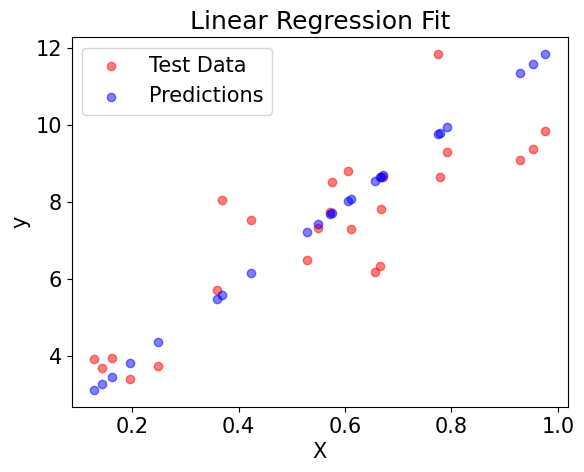

In [ ]:
# TODO: Now visualzie the test data with parameters "color ='r', label="Test Data")"
plt.scatter(X_test, y_test, color='r', label="Test Data", alpha=0.5)
y_pred = model.predict(X_test)
plt.scatter(X_test, y_pred, color='b', label="Predictions", alpha=0.5)


# TODO: Now visualzie the predicted plit with plt.scatter "color ='b', label="predictions")"

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

### Wrapping the Solution

In [ ]:
def perform_linear_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return model, mse

In [ ]:
model, mse = perform_linear_regression(X, y)
print('Mean Squared Error:', mse)

Mean Squared Error: 1.8223525998736825


# Advanced: Polynomial Basis Regression

<img src="https://i.ibb.co/XDR9G0c/wizard-6.png" alt="Magic2" width="500"/>


## The Polynomial Basis Trick
Earlier in class, we discussed how to extend linear regression into a non-linear variant based on a basis change trick.

The "polynomial trick" is a technique used to capture more complex relationships in data without moving away from the simplicity of linear regression models.

Let's consider a simple linear regression problem where we have one input feature `x` and one output `y`. If the relationship between `x` and `y` is not a straight line but rather a curve, a linear regression model of the form `y = ax + b` would not fit the data well.

Here's where the polynomial trick comes in. Instead of trying to fit a line to the data, we can fit a polynomial, like `y = ax^2 + bx + c`. This is still a linear model in terms of its parameters `a`, `b`, and `c`, but it can capture a curved relationship between `x` and `y`.

The trick is to create new features that are powers of `x`. For example, we can create a new feature `x^2`. Now our features are `[x, x^2]` and our model becomes `y = a1*x + a2*x^2 + b`. This is a linear model in terms of `a1`, `a2`, and `b`, but it's a polynomial model in terms of `x`.

By introducing these higher-order terms, we can build more flexible models that can capture the nuances of the data more accurately. This forms the basis of Polynomial Regression, a technique that extends the simplicity of linear regression to fit more complex trends in the data.

### Polynomial Trick: Import Libraries

In [ ]:
# sklearn already has an implementation of the polynomial features we are looking for!
from sklearn.preprocessing import PolynomialFeatures

### Polynomial Trick: Creating non-linear relationship

We start off with our linear regression, what happens as we vary the degree?

In [ ]:
# Let us regenerate our data but with a non-linear relation now!

np.random.seed(0)  # for reproducibility

# number of samples
N = 20000

# select parameters for the generated data and the noise
slope = 10
intercept = 2
noise_scale = 0.5


X = np.random.randn(N, 1)  # 100 random numbers

# write a polynomial of degree 3 relating the of the form (slope*x^3 + intercept  + noise)
y_without_noise = slope * X ** 3 + intercept

# the cubic relation with some noisy measurments
y = y_without_noise + noise_scale * np.random.randn(N, 1)  # linear relationship with some noise


In [ ]:
#split your data into training (80%) and testing(20%);
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

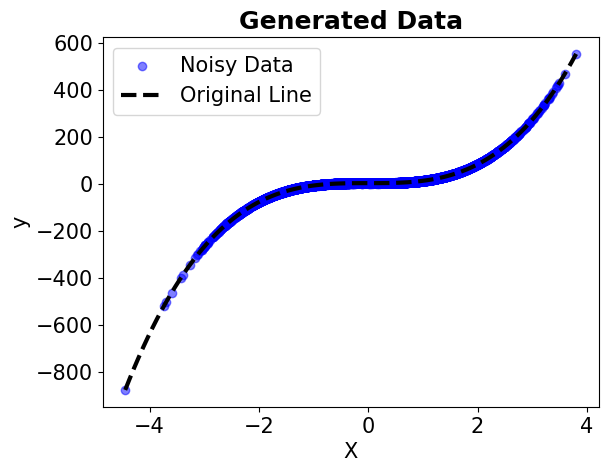

In [ ]:
# Generate a range of x values
x_range = np.linspace(X.min(), X.max(), 100)

# Calculate the corresponding y values without noise again
y_range = 10 * x_range**3 + 2

# Plot the original data and the fitted line
plt.scatter(X, y, color ='b', alpha=0.5, label="Noisy Data")
plt.plot(x_range, y_range, color ='k', linestyle='--', linewidth=3, label="Original Line")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Generated Data', fontweight='bold')
plt.show()

In [ ]:
# choose degree order
degree = 0
poly_features = PolynomialFeatures(degree=degree)

# pick the first sample from your dataset X
x_sample = X_train[0].reshape(1,1)
print(x_sample)


# generate all monomials for that polynomial; for example a degree 3 polynomial will have the monomials (x^0, x^1, x^2, x^3)
x_sample_poly_filled = np.zeros((1,degree+1))
for i in  range(degree+1):
  #fill in the varaible x_sample_poly_filled with all monomials
  pass
print(x_sample_poly_filled)

# the function poly_features.fit_transform(X) generates all high order terms in the polynomial
x_sample_poly = poly_features.fit_transform(x_sample)
print(x_sample_poly)

[[2.4653965]]
[[0.]]
[[1.]]


### Investigating what does the function ".fit" from the class "LinearRegression" do?

* Recall from the class that the optimization problem has the following form where we have the data in the case of 3rd order poylomial with linear regression to be as follows
$$
\min_{w_0,w_1,w_2,w_3} \mathcal{L}(w_0,w_1,w_2,w_3) = \frac{1}{N} \sum_{i=1}^N(w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 - y_i)^2
$$

* We have to solve the following set of equations for all the model parameters

$$
\begin{align*}
& \frac{2}{N} \sum_{i=1}^N (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 - y_i) = 0 \\
& \frac{2}{N} \sum_{i=1}^N (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 - y_i)x_i = 0 \\
& \frac{2}{N} \sum_{i=1}^N (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 - y_i)x_i^2 = 0 \\
& \frac{2}{N} \sum_{i=1}^N (w_0 + w_1 x_i + w_2 x_i^2 + w_3 x_i^3 - y_i)x_i^3 = 0 \\
\end{align*}
$$

* This might be difficult to do (it is possible if you think of linear algebra), but we have a function that solves this problem for us which is (model.fit(X_train, y_train))

* Let us implement the solutions down below

In [ ]:
degree = 3
poly_features = PolynomialFeatures(degree=degree)

# generate the polynomials over the full dataset X without a for loop
X_poly = poly_features.fit_transform(X)


model = LinearRegression()
# fit the polynomial data X_poly to your labels y (Recall use model.fit)
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# print the coefficients and intercept
print(model.coef_)
print(model.intercept_)

[[ 0.00000000e+00  1.28495901e-02 -2.05719988e-04  9.99733644e+00]]
[1.99836943]


### How does prediction work?
* Simply the coefficients in model represent w_1, w_2, and w_3 the first element is always zero as it represents the intercept anyways
* the intercept represents w_0

In [ ]:
x_test = np.array([2]).reshape(1,1)

# generate the polynomials of this test sample (x_test)
x_test_poly = poly_features.transform(x_test)
print(x_test_poly)

# predict using model.predict
model_predict_of_x_test = model.predict(x_test_poly)
print(model_predict_of_x_test)

# predict directly by writing the equation w_0 + w_1 x + w_2 x^2 + w_3 x^3
w0 = model.intercept_[0]
w1, w2, w3 = model.coef_[0][1], model.coef_[0][2], model.coef_[0][3]
x = x_test[0][0]
model_predict_explicit_formula = w0 + w1 * x + w2 * x**2 + w3 * x**3
print(model_predict_explicit_formula)

[[1. 2. 4. 8.]]
[[82.00193725]]
82.00193725465861


In [ ]:
def perform_linear_regression_with_poly(X, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    return model, mse_train, mse_test, y_train_pred, y_test_pred

We will collect the MSE loss for different degrees of our polynomial fitting and then visualize the MSE loss.

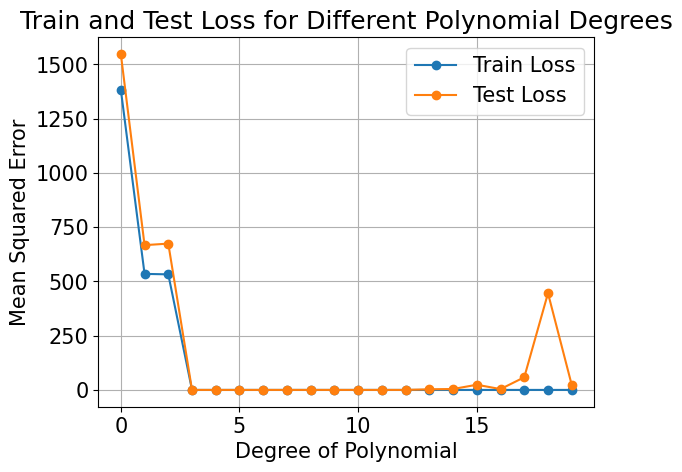

In [ ]:
# List to store the Mean Squared Errors (MSE) for the training and testing sets
mse_train_list = list()
mse_test_list = list()

# Range of polynomial degrees to consider
degrees = range(20)

# Perform linear regression with polynomial basis for each degree and store the MSE
for degree in degrees:
    _, mse_train, mse_test,_, _ = perform_linear_regression_with_poly(X, y, degree=degree)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)

# Plot the MSE for the training and testing sets
plt.plot(degrees, mse_train_list, label="Train Loss", marker='o')
plt.plot(degrees, mse_test_list, label="Test Loss", marker='o')
plt.legend(loc='best')
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.title("Train and Test Loss for Different Polynomial Degrees")
plt.grid(True)
plt.show()

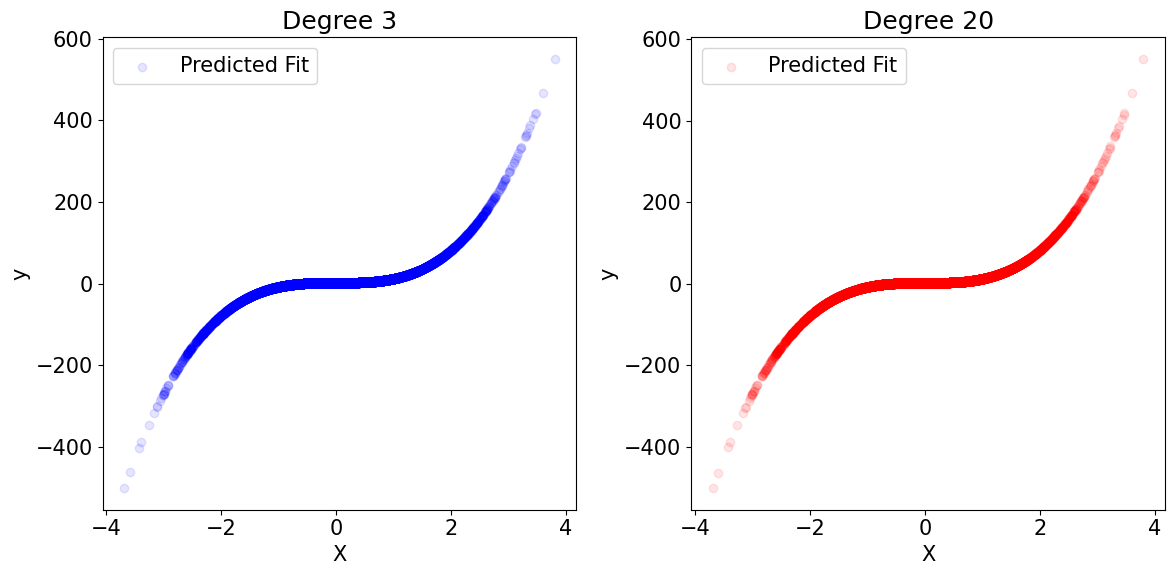

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Degree 3
model, mse_train, mse_test, y_train_pred, y_test_pred = perform_linear_regression_with_poly(X, y, degree=3)
axs[0].scatter(X_train, y_train_pred, color='b', label="Predicted Fit", alpha=0.1)
axs[0].set_xlabel('X')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('Degree 3')

# Subplot 2: Degree 15
model, mse_train, mse_test, y_train_pred, y_test_pred = perform_linear_regression_with_poly(X, y, degree=20)
axs[1].scatter(X_train, y_train_pred, color='r', label="Predicted Fit", alpha=0.1)
axs[1].set_xlabel('X')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].set_title('Degree 20')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with subplots
plt.show()

### Oh! What's happening over here?? Overfitting 😒 You should always be smart about the choice of fitting degree!

<img src="https://i.ibb.co/dbZKB6d/wizard-5.png" alt="Predicted Fit" width="400"/>
